# Task 2 - Prediction of store sales


In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Prediction of sales is the central task in this challenge. you want to predict daily sales in
various stores up to 6 weeks ahead of time. This will help the company plan ahead of
time.


In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [70]:

train_data = pd.read_csv("/content/drive/MyDrive/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")
store = pd.read_csv("/content/drive/MyDrive/store.csv")


In [71]:
store.shape

(1115, 10)

In [72]:
train_data.shape

(1017209, 9)

In [73]:
test_data.shape

(41088, 8)

# 2.1 Preprocessing

#### It is important to process the data into a format where it can be fed to a machine learning model. This typically means converting all non-numeric columns to numeric, handling NaN values and generating new features from already existing features.

In [74]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [75]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


# Merge data

In [76]:
# Merging "store_data" with "train_data"
train_data_merged = train_data.merge(store, on='Store', how='left')

train_data_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [77]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [78]:
# Merging "store_data" with "test_data"
test_data_merged = test_data.merge(store, on='Store', how='left')

In [79]:
test_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [80]:
train_data_merged['Date'] = pd.to_datetime(train_data_merged['Date'])

In [81]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [82]:
test_data_merged['Date'] = pd.to_datetime(test_data_merged['Date'])

In [83]:
test_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

# Description Of datasets

In [84]:
test_data_merged.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [85]:
train_data_merged.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


# 2.1 Preprocessing


It is important to process the data into a format where it can be fed to a machine learning model. This typically means converting all non-numeric columns to numeric, handling NaN values and generating new features from already existing features.


In our case, you have a few datetime columns to preprocess. you can extract the following from them:


weekdays


weekends

number of days to holidays

Number of days after holiday

Beginning of month, mid month and ending of month
(think of more features to extract), extra marks for it


As a final thing, you have to scale the data. This helps with predictions especially when using machine learning algorithms that use Euclidean distances. you can use the standard scaler in sklearn for this.


In [86]:
# Extract features from datetime for both train and test data
train_data_merged['weekday'] = train_data_merged['Date'].dt.weekday
train_data_merged['is_weekend'] = train_data_merged['weekday'].apply(lambda x: 1 if x >= 5 else 0)

test_data_merged['weekday'] = test_data_merged['Date'].dt.weekday
test_data_merged['is_weekend'] = test_data_merged['weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [87]:
test_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [88]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [89]:
train_data_merged['SalesPerCustomer'] = train_data_merged['Sales'] / train_data_merged['Customers']


In [90]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

train_data_merged['Season'] = train_data_merged['Date'].dt.month.apply(get_season)


In [91]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

test_data_merged['Season'] = test_data_merged['Date'].dt.month.apply(get_season)


In [92]:
holiday_dates = [
    pd.to_datetime('2023-01-01'),
    pd.to_datetime('2023-04-15'),
    pd.to_datetime('2023-07-04'),
    pd.to_datetime('2023-12-25')
]

In [93]:
train_data_merged['IsBeginningOfMonth'] = (train_data_merged['Date'].dt.day <= 10).astype(int)
train_data_merged['IsMidOfMonth'] = ((train_data_merged['Date'].dt.day > 10) & (train_data_merged['Date'].dt.day <= 20)).astype(int)
train_data_merged['IsEndOfMonth'] = (train_data_merged['Date'].dt.day > 20).astype(int)

test_data_merged['IsBeginningOfMonth'] = (test_data_merged['Date'].dt.day <= 10).astype(int)
test_data_merged['IsMidOfMonth'] = ((test_data_merged['Date'].dt.day > 10) & (test_data_merged['Date'].dt.day <= 20)).astype(int)
test_data_merged['IsEndOfMonth'] = (test_data_merged['Date'].dt.day > 20).astype(int)


In [94]:
# Calculate days to and after holidays
train_data_merged['DaysToHoliday'] = ((holiday_dates[0] - train_data_merged['Date']).dt.days).clip(lower=0)
train_data_merged['DaysAfterHoliday'] = ((train_data_merged['Date'] - holiday_dates[-1]).dt.days).clip(lower=0)

test_data_merged['DaysToHoliday'] = ((holiday_dates[0] - test_data_merged['Date']).dt.days).clip(lower=0)
test_data_merged['DaysAfterHoliday'] = ((test_data_merged['Date'] - holiday_dates[-1]).dt.days).clip(lower=0)

In [95]:
train_data_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,weekday,is_weekend,SalesPerCustomer,Season,IsBeginningOfMonth,IsMidOfMonth,IsEndOfMonth,DaysToHoliday,DaysAfterHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,4,0,9.482883,Summer,0,0,1,2711,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",4,0,9.702400,Summer,0,0,1,2711,0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",4,0,10.126675,Summer,0,0,1,2711,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,4,0,9.342457,Summer,0,0,1,2711,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,4,0,8.626118,Summer,0,0,1,2711,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,"Jan,Apr,Jul,Oct",1,0,NaN,Winter,1,0,0,3652,0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,NaN,1,0,NaN,Winter,1,0,0,3652,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,1,0,NaN,Winter,1,0,0,3652,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,1,0,NaN,Winter,1,0,0,3652,0


In [96]:
test_data_merged.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,weekday,is_weekend,Season,IsBeginningOfMonth,IsMidOfMonth,IsEndOfMonth,DaysToHoliday,DaysAfterHoliday
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,...,2013.0,"Jan,Apr,Jul,Oct",5,1,Summer,1,0,0,2710,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,...,NaN,NaN,5,1,Summer,1,0,0,2710,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,...,NaN,NaN,5,1,Summer,1,0,0,2710,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,...,NaN,NaN,5,1,Summer,1,0,0,2710,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1,d,c,...,2012.0,"Mar,Jun,Sept,Dec",5,1,Summer,1,0,0,2710,0


In [97]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [98]:
test_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [99]:
train_data_merged['StateHoliday'] = train_data_merged['StateHoliday'].astype(str)


In [100]:
# Defining a function to separate categorical and numerical data
def separate_categorical_and_continious(data):
    categorical_cols, numerical_cols = [] , []
    for cols in data.columns:
        if data[cols].dtypes == "object":
            categorical_cols.append(cols)
        else:
            numerical_cols.append(cols)
    return categorical_cols, numerical_cols

# Separating categorical and numerical data from train and test data
categorical_cols_train, numerical_cols_train = separate_categorical_and_continious(train_data_merged)
categorical_cols_test, numerical_cols_test = separate_categorical_and_continious(test_data_merged)



In [101]:
categorical_cols_test, numerical_cols_test

(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval', 'Season'],
 ['Id',
  'Store',
  'DayOfWeek',
  'Date',
  'Open',
  'Promo',
  'SchoolHoliday',
  'CompetitionDistance',
  'CompetitionOpenSinceMonth',
  'CompetitionOpenSinceYear',
  'Promo2',
  'Promo2SinceWeek',
  'Promo2SinceYear',
  'weekday',
  'is_weekend',
  'IsBeginningOfMonth',
  'IsMidOfMonth',
  'IsEndOfMonth',
  'DaysToHoliday',
  'DaysAfterHoliday'])

In [102]:
categorical_cols_train, numerical_cols_train

(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval', 'Season'],
 ['Store',
  'DayOfWeek',
  'Date',
  'Sales',
  'Customers',
  'Open',
  'Promo',
  'SchoolHoliday',
  'CompetitionDistance',
  'CompetitionOpenSinceMonth',
  'CompetitionOpenSinceYear',
  'Promo2',
  'Promo2SinceWeek',
  'Promo2SinceYear',
  'weekday',
  'is_weekend',
  'SalesPerCustomer',
  'IsBeginningOfMonth',
  'IsMidOfMonth',
  'IsEndOfMonth',
  'DaysToHoliday',
  'DaysAfterHoliday'])

In [103]:
# encoding
from sklearn.preprocessing import LabelEncoder

In [104]:
encoder = LabelEncoder()

In [105]:
train_data_merged['StoreType'] = encoder.fit_transform(train_data_merged['StoreType'])

In [106]:
train_data_merged['StateHoliday'] = train_data_merged['StateHoliday'].astype(str)


In [107]:
train_data_merged['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [108]:
train_data_merged['StateHoliday'] = encoder.fit_transform(train_data_merged['StateHoliday'])
train_data_merged['Assortment'] = encoder.fit_transform(train_data_merged['Assortment'])
train_data_merged['PromoInterval'] = encoder.fit_transform(train_data_merged['PromoInterval'])
train_data_merged['Season'] = encoder.fit_transform(train_data_merged['Season'])


In [109]:
test_data_merged['StoreType'] = encoder.fit_transform(test_data_merged['StoreType'])

In [110]:
test_data_merged['StateHoliday'] = test_data_merged['StateHoliday'].astype(str)


In [111]:
test_data_merged['StateHoliday'] = encoder.fit_transform(test_data_merged['StateHoliday'])
test_data_merged['Assortment'] = encoder.fit_transform(test_data_merged['Assortment'])
test_data_merged['PromoInterval'] = encoder.fit_transform(test_data_merged['PromoInterval'])
test_data_merged['Season'] = encoder.fit_transform(test_data_merged['Season'])


In [112]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1014567 no

In [113]:
test_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  int64         
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  int64         
 9   Assortment                 41088 non-null  int64         
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [114]:
train_data_merged.shape

(1017209, 27)

In [115]:
test_data_merged.shape

(41088, 25)

In [116]:
train_data_merged.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'weekday', 'is_weekend',
       'SalesPerCustomer', 'Season', 'IsBeginningOfMonth', 'IsMidOfMonth',
       'IsEndOfMonth', 'DaysToHoliday', 'DaysAfterHoliday'],
      dtype='object')

In [117]:
test_data_merged.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'weekday',
       'is_weekend', 'Season', 'IsBeginningOfMonth', 'IsMidOfMonth',
       'IsEndOfMonth', 'DaysToHoliday', 'DaysAfterHoliday'],
      dtype='object')

In [118]:
# Drop columns from train_data_merged
train_data_merged.drop(columns=['Sales', 'Customers'], inplace=True)

# Drop columns from test_data_merged
test_data_merged.drop(columns=['Id'], inplace=True)


In [119]:
train_data_merged.set_index('Date', inplace=True)
train_data_merged.sort_index(inplace=True)


In [120]:
test_data_merged.set_index('Date', inplace=True)
test_data_merged.sort_index(inplace=True)


In [121]:
# Scale the data using StandardScaler for both train and test data
scaler = StandardScaler()

In [122]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()




In [123]:
# Apply Min-Max scaling to train_data_merged
train_data_merged_scaled = scaler.fit_transform(train_data_merged)


In [124]:

# Apply Min-Max scaling to test_data_merged
test_data_merged_scaled = scaler.fit_transform(test_data_merged)

# **2.2 Building models with sklearn pipelines**

# **2.3 Choose a loss function**

In [125]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [126]:
train_data_merged.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'weekday',
       'is_weekend', 'SalesPerCustomer', 'Season', 'IsBeginningOfMonth',
       'IsMidOfMonth', 'IsEndOfMonth', 'DaysToHoliday', 'DaysAfterHoliday'],
      dtype='object')

In [127]:
# Define X and y
X = train_data_merged[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
                      'StoreType', 'Assortment', 'CompetitionDistance',
                      'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
                      'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'weekday',
                      'is_weekend', 'Season', 'IsBeginningOfMonth',
                      'IsMidOfMonth', 'IsEndOfMonth', 'DaysToHoliday', 'DaysAfterHoliday']]
y = train_data_merged['SalesPerCustomer']

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
print('X_Train shape:',X_train.shape)
print('X_Test shape:',X_test.shape)
print('Y_Train shape:',y_train.shape)
print('Y_Test shape:',y_test.shape)

X_Train shape: (813767, 23)
X_Test shape: (203442, 23)
Y_Train shape: (813767,)
Y_Test shape: (203442,)


In [130]:
# Making separate lists for categorical and numerical columns
categorical_cols, numerical_cols = [], []

for i in train_data_merged.columns:
    print("The datatype for {} is {}".format(i,train_data_merged[i].dtypes))
    # check if the datatype is object or not
    if train_data_merged[i].dtypes == "object":
        # if the datatype is object : --> fillna with mode of that column
        mode_value = train_data_merged[i].mode()[0]
        train_data_merged[i].fillna(mode_value, inplace = True)
    elif train_data_merged[i].dtypes != "object":
        # if data[i].dtypes == "bool":
        #     data[i].fillna(0, inplace = True)
        # else:
        # else if the datatype is numerical : --> fillna with mean of that column
        mean_value = train_data_merged[i].mean()
        train_data_merged[i].fillna(mean_value, inplace = True)

The datatype for Store is int64
The datatype for DayOfWeek is int64
The datatype for Open is int64
The datatype for Promo is int64
The datatype for StateHoliday is int64
The datatype for SchoolHoliday is int64
The datatype for StoreType is int64
The datatype for Assortment is int64
The datatype for CompetitionDistance is float64
The datatype for CompetitionOpenSinceMonth is float64
The datatype for CompetitionOpenSinceYear is float64
The datatype for Promo2 is int64
The datatype for Promo2SinceWeek is float64
The datatype for Promo2SinceYear is float64
The datatype for PromoInterval is int64
The datatype for weekday is int64
The datatype for is_weekend is int64
The datatype for SalesPerCustomer is float64
The datatype for Season is int64
The datatype for IsBeginningOfMonth is int64
The datatype for IsMidOfMonth is int64
The datatype for IsEndOfMonth is int64
The datatype for DaysToHoliday is int64
The datatype for DaysAfterHoliday is int64


In [131]:
# Making separate lists for categorical and numerical columns
categorical_cols, numerical_cols = [], []

for i in test_data_merged.columns:
    print("The datatype for {} is {}".format(i,test_data_merged[i].dtypes))
    # check if the datatype is object or not
    if test_data_merged[i].dtypes == "object":
        # if the datatype is object : --> fillna with mode of that column
        mode_value = test_data_merged[i].mode()[0]
        test_data_merged[i].fillna(mode_value, inplace = True)
    elif test_data_merged[i].dtypes != "object":
        mean_value = test_data_merged[i].mean()
        test_data_merged[i].fillna(mean_value, inplace = True)

The datatype for Store is int64
The datatype for DayOfWeek is int64
The datatype for Open is float64
The datatype for Promo is int64
The datatype for StateHoliday is int64
The datatype for SchoolHoliday is int64
The datatype for StoreType is int64
The datatype for Assortment is int64
The datatype for CompetitionDistance is float64
The datatype for CompetitionOpenSinceMonth is float64
The datatype for CompetitionOpenSinceYear is float64
The datatype for Promo2 is int64
The datatype for Promo2SinceWeek is float64
The datatype for Promo2SinceYear is float64
The datatype for PromoInterval is int64
The datatype for weekday is int64
The datatype for is_weekend is int64
The datatype for Season is int64
The datatype for IsBeginningOfMonth is int64
The datatype for IsMidOfMonth is int64
The datatype for IsEndOfMonth is int64
The datatype for DaysToHoliday is int64
The datatype for DaysAfterHoliday is int64


In [132]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Open                       1017209 non-null  int64  
 3   Promo                      1017209 non-null  int64  
 4   StateHoliday               1017209 non-null  int64  
 5   SchoolHoliday              1017209 non-null  int64  
 6   StoreType                  1017209 non-null  int64  
 7   Assortment                 1017209 non-null  int64  
 8   CompetitionDistance        1017209 non-null  float64
 9   CompetitionOpenSinceMonth  1017209 non-null  float64
 10  CompetitionOpenSinceYear   1017209 non-null  float64
 11  Promo2                     1017209 non-null  int64  
 12  Promo2SinceWeek            1017209 non-null  float64
 1

In [133]:
train_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Open                       1017209 non-null  int64  
 3   Promo                      1017209 non-null  int64  
 4   StateHoliday               1017209 non-null  int64  
 5   SchoolHoliday              1017209 non-null  int64  
 6   StoreType                  1017209 non-null  int64  
 7   Assortment                 1017209 non-null  int64  
 8   CompetitionDistance        1017209 non-null  float64
 9   CompetitionOpenSinceMonth  1017209 non-null  float64
 10  CompetitionOpenSinceYear   1017209 non-null  float64
 11  Promo2                     1017209 non-null  int64  
 12  Promo2SinceWeek            1017209 non-null  float64
 1

In [ ]:
# Define X and y
X = train_data_merged[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
                      'StoreType', 'Assortment', 'CompetitionDistance',
                      'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
                      'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'weekday',
                      'is_weekend', 'Season', 'IsBeginningOfMonth',
                      'IsMidOfMonth', 'IsEndOfMonth', 'DaysToHoliday', 'DaysAfterHoliday']]
y = train_data_merged['SalesPerCustomer']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression:

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming train_data_merged contains the complete dataset
# Remove rows with missing values from X_train and y_train
X_train = train_data_merged.dropna(subset=X.columns)
y_train = X_train['SalesPerCustomer']
X_train = X_train.drop(columns=['SalesPerCustomer'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)




In [ ]:


# Define the imputer and regressor
imputer = SimpleImputer(strategy='mean')
regressor = LinearRegression()

# Create a pipeline
pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('regressor', regressor)
])

# Fit the pipeline to the data
pipeline.fit(X_train, y_train)

# Predict using the fitted pipeline
y_pred = pipeline.predict(X_test)

# Calculate the mean squared error
lr_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", lr_mse)


Mean Squared Error: 2.7016169582419196


In [ ]:
# Decision Tree and Random Forest:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
tree_y_pred = tree_regressor.predict(X_test)

forest_regressor = RandomForestRegressor(random_state=42)
forest_regressor.fit(X_train, y_train)
forest_y_pred = forest_regressor.predict(X_test)

tree_mse = mean_squared_error(y_test, tree_y_pred)
forest_mse = mean_squared_error(y_test, forest_y_pred)

print("Decision Tree MSE:", tree_mse)
print("Random Forest MSE:", forest_mse)


Decision Tree MSE: 0.5101213385699144
Random Forest MSE: 0.2821714188136668


In [ ]:

  # KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
print('X_Train shape:',X_train.shape)
print('X_Test shape:',X_test.shape)
print('Y_Train shape:',y_train.shape)
print('Y_Test shape:',y_test.shape)

# Train the model
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_regressor.predict(X_test)

# Calculate Mean Squared Error
knn_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", knn_mse)




X_Train shape: (813767, 23)
X_Test shape: (203442, 23)
Y_Train shape: (813767,)
Y_Test shape: (203442,)
Mean Squared Error: 1.1892458377284563


In [ ]:
# Deep Learning - Neural Network:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
25431/25431 [==============================] - 59s 2ms/step - loss: 93.7402 - val_loss: 3.8527
Epoch 2/10
25431/25431 [==============================] - 57s 2ms/step - loss: 2.8224 - val_loss: 2.3602
Epoch 3/10
25431/25431 [==============================] - 71s 3ms/step - loss: 2.4563 - val_loss: 2.5543
Epoch 4/10
25431/25431 [==============================] - 60s 2ms/step - loss: 2.3438 - val_loss: 2.3948
Epoch 5/10
25431/25431 [==============================] - 60s 2ms/step - loss: 2.2540 - val_loss: 2.1722
Epoch 6/10
25431/25431 [==============================] - 63s 2ms/step - loss: 2.1974 - val_loss: 2.1492
Epoch 7/10
25431/25431 [==============================] - 76s 3ms/step - loss: 2.1743 - val_loss: 2.1337
Epoch 8/10
25431/25431 [==============================] - 74s 3ms/step - loss: 2.1501 - val_loss: 2.0492
Epoch 9/10
25431/25431 [==============================] - 73s 3ms/step - loss: 2.1364 - val_loss: 2.3243
Epoch 10/10
25431/25431 [=============================

In [ ]:
# Predict using the trained model
y_pred_rnn = model.predict(X_test)

# Calculate MSE
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print("Mean Squared Error (RNN):", mse_rnn)

6358/6358 [==============================] - 13s 2ms/step
Mean Squared Error (RNN): 2.023630975358538


In [ ]:
 # Deep Learning - LSTM:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np


X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    Dense(1)  # Output layer for regression
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/10
25431/25431 [==============================] - 485s 19ms/step - loss: 89.9423 - val_loss: 4.2388
Epoch 2/10
25431/25431 [==============================] - 454s 18ms/step - loss: 261.6479 - val_loss: 4.2738
Epoch 3/10
25431/25431 [==============================] - 462s 18ms/step - loss: 124.1593 - val_loss: 6.5990
Epoch 4/10
25431/25431 [==============================] - 461s 18ms/step - loss: 12.2709 - val_loss: 3.6073
Epoch 5/10
25431/25431 [==============================] - 464s 18ms/step - loss: 33.0634 - val_loss: 3.7913
Epoch 6/10
25431/25431 [==============================] - 472s 19ms/step - loss: 8.3076 - val_loss: 3.5096
Epoch 7/10
25431/25431 [==============================] - 477s 19ms/step - loss: 7456.4580 - val_loss: 20.4027
Epoch 8/10
25431/25431 [==============================] - 466s 18ms/step - loss: 486.6065 - val_loss: 4.3776
Epoch 9/10
25431/25431 [==============================] - 458s 18ms/step - loss: 60323.9727 - val_loss: 1928.6310
Epoch 10/10
25431

In [87]:
from sklearn.metrics import mean_squared_error

# Predict using the trained LSTM model
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Calculate MSE
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("Mean Squared Error (LSTM):", mse_lstm)


6358/6358 [==============================] - 58s 9ms/step
Mean Squared Error (LSTM): 6.254383837923506


In [88]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest',  'Neural Network', 'LSTM', 'KNN'],
    'MSE': [lr_mse, tree_mse, forest_mse, mse_rnn, mse_lstm, knn_mse]
})

print(results_df)


               Model       MSE
0  Linear Regression  2.701617
1      Decision Tree  0.510121
2      Random Forest  0.282171
3     Neural Network  2.023631
4               LSTM  6.254384
5                KNN  1.189246


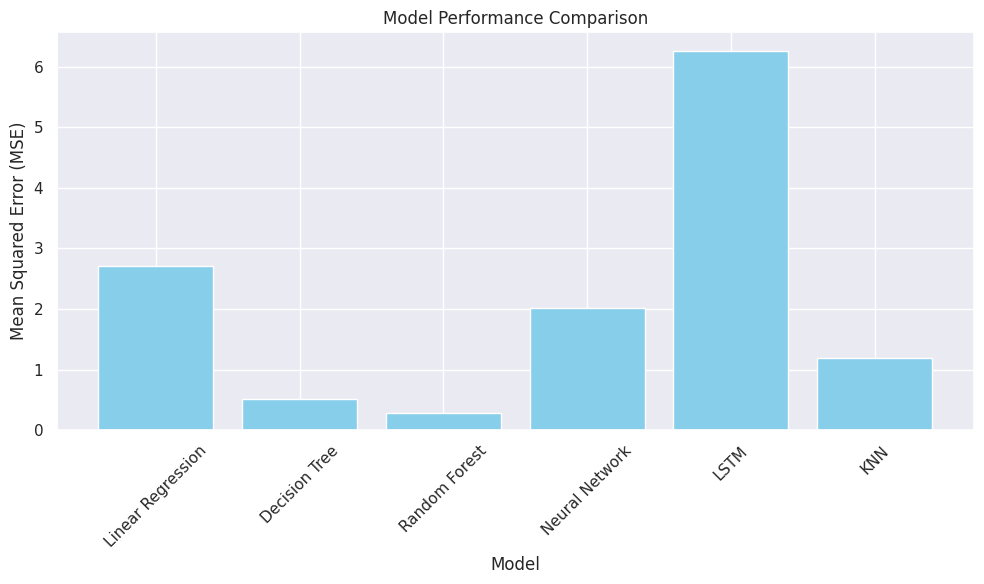

In [89]:
# Create a bar plot to visualize model performance
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['MSE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **2.4 Post Prediction analysis**

In [90]:
# Post-Prediction Analysis:

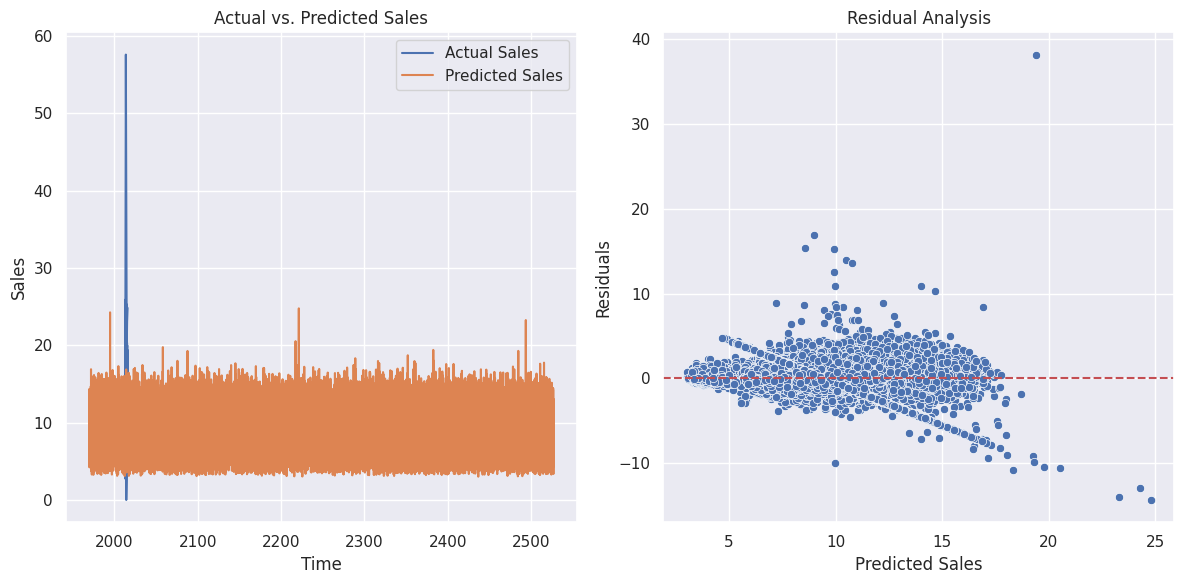

MAE for Store Type '0': 0.7969396724017819
MAE for Store Type '1': 0.7969396724017819
MAE for Store Type '2': 0.7969396724017819
MAE for Store Type '3': 0.7969396724017819


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Visualize predictions and residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(y_test, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Actual vs. Predicted Sales")
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Analysis")

plt.tight_layout()
plt.show()
from sklearn.metrics import mean_absolute_error

# Segment analysis (example)
store_type_segments = train_data_merged.groupby('StoreType')
for store_type, group in store_type_segments:
    segment_mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE for Store Type '{store_type}': {segment_mae}")


In [102]:
train_data_merged.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'weekday',
       'is_weekend', 'SalesPerCustomer', 'Season', 'IsBeginningOfMonth',
       'IsMidOfMonth', 'IsEndOfMonth', 'DaysToHoliday', 'DaysAfterHoliday'],
      dtype='object')

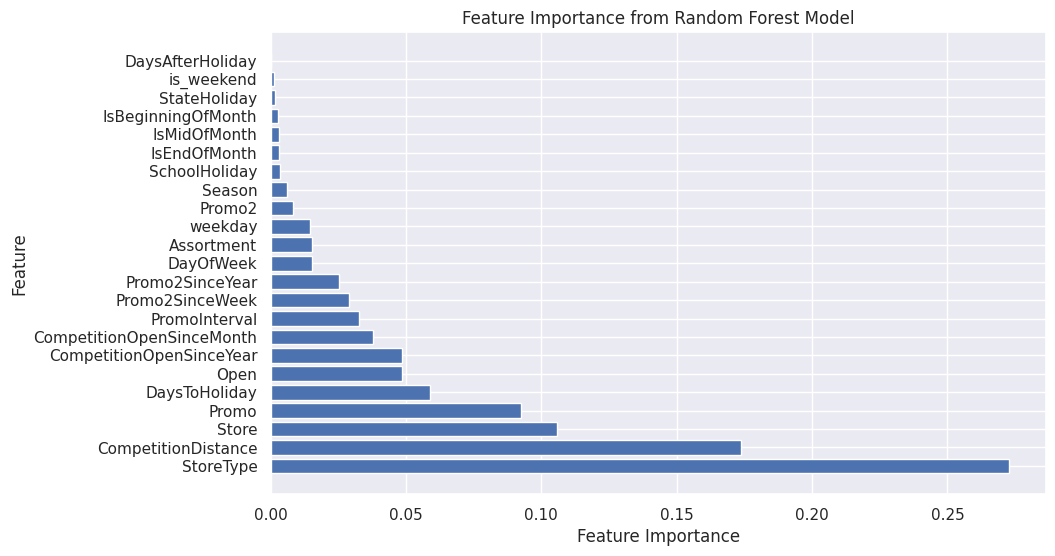

Feature Importance:
                      Feature  Importance
6                   StoreType    0.272641
8         CompetitionDistance    0.173890
0                       Store    0.105843
3                       Promo    0.092580
21              DaysToHoliday    0.058753
2                        Open    0.048597
10   CompetitionOpenSinceYear    0.048566
9   CompetitionOpenSinceMonth    0.037819
14              PromoInterval    0.032568
12            Promo2SinceWeek    0.028883
13            Promo2SinceYear    0.025276
1                   DayOfWeek    0.015243
7                  Assortment    0.015118
15                    weekday    0.014671
11                     Promo2    0.008240
17                     Season    0.006049
5               SchoolHoliday    0.003642
20               IsEndOfMonth    0.003259
19               IsMidOfMonth    0.003043
18         IsBeginningOfMonth    0.002615
4                StateHoliday    0.001639
16                 is_weekend    0.001066
22           D

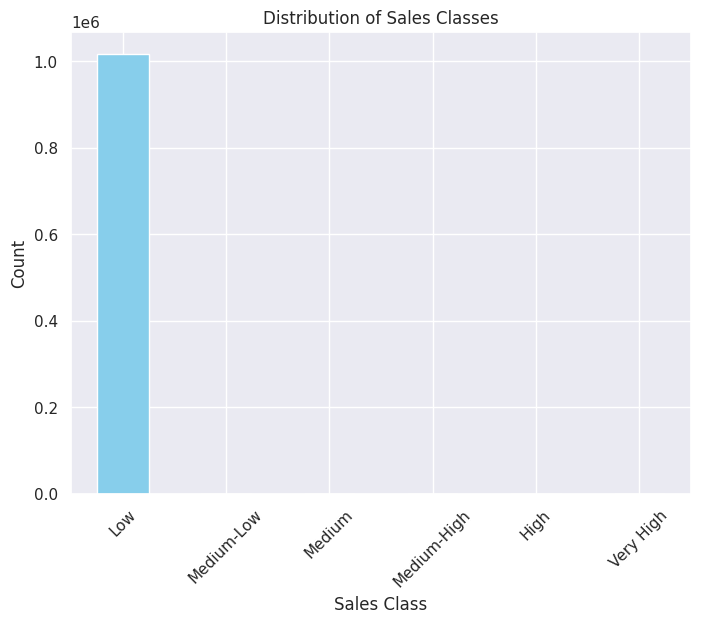

Class Interval Distribution:
Low            1017207
Medium-Low           0
Medium               0
Medium-High          0
High                 0
Very High            0
Name: SalesClass, dtype: int64


In [138]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt



# Define class intervals for the 'Sales' column
class_intervals = [0, 100, 500, 1000, 5000, 10000, float('inf')]
class_labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High', 'Very High']

# Apply class interval labels to 'Sales' column
train_data_merged['SalesClass'] = pd.cut(train_data_merged['SalesPerCustomer'], bins=class_intervals, labels=class_labels)

# Define features and target
features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'weekday',
       'is_weekend',  'Season', 'IsBeginningOfMonth',
       'IsMidOfMonth', 'IsEndOfMonth', 'DaysToHoliday', 'DaysAfterHoliday']
target = 'SalesPerCustomer'

# Assuming train_data_merged contains your preprocessed data
train_features = train_data_merged[features]
train_labels = train_data_merged[target]

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(train_features, train_labels)

# Retrieve feature importance scores
feature_importance = model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model')
plt.show()

print("Feature Importance:")
print(feature_importance_df)




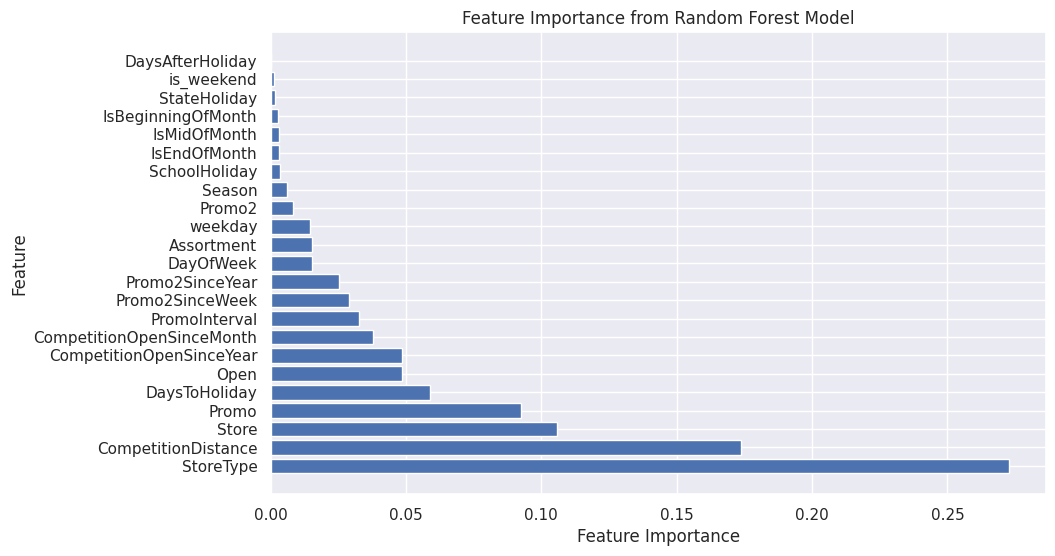

Feature Importance:
                      Feature  Importance
6                   StoreType    0.272641
8         CompetitionDistance    0.173890
0                       Store    0.105843
3                       Promo    0.092580
21              DaysToHoliday    0.058753
2                        Open    0.048597
10   CompetitionOpenSinceYear    0.048566
9   CompetitionOpenSinceMonth    0.037819
14              PromoInterval    0.032568
12            Promo2SinceWeek    0.028883
13            Promo2SinceYear    0.025276
1                   DayOfWeek    0.015243
7                  Assortment    0.015118
15                    weekday    0.014671
11                     Promo2    0.008240
17                     Season    0.006049
5               SchoolHoliday    0.003642
20               IsEndOfMonth    0.003259
19               IsMidOfMonth    0.003043
18         IsBeginningOfMonth    0.002615
4                StateHoliday    0.001639
16                 is_weekend    0.001066
22           D

In [140]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model')
plt.show()

print("Feature Importance:")
print(feature_importance_df)


print(class_interval_distribution)

In [135]:
train_data_merged.to_csv("train_df.csv")

In [136]:
test_data_merged.to_csv("test_df.csv")